In [5]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist

In [6]:
df = pd.read_csv('fashion data.csv')
df.head()

,year,season,brand,author of review,location,time,review text
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ..."
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...


In [7]:
reviews = df['review text']
len(reviews) # We have 1235 reviews and continue on them to get some insightful knowledges.

434

In [4]:
reviews.tolist()

['Detachment was the word of the day at A Dtacher (yes, like the labels name, bien sr). Designer Mona Kowalska loves the high concept, and one imagines that today detachment included being unconcerned with the gaze of others. Kowalskas woman, both as she appears on the runway and the real world, dresses for herself. Her intensely arty bend, and taste for clothes that match it, make A Dtacher a cultishly beloved brand among certain shoppers. This season, Kowalska presented them with a lineup of relatively playful offerings.\rThe collection opened with a pair of midi dresses in an Indonesian-inspired floral print, which reemerged later imagined with allover Pop white polka dots. Elsewhere came cardigans in an uncanny kind of amoxicillin pink that you imagined the A Dtacher woman wearing with tongue firmly in cheek (they had Kawakubo-esque allover holes, to boot). The popcorn knits were pretty fun, too.\rThe choice to use hardier materials lent dresses eccentric volumes, but also led to a

## 1. Use a simple bag-of-words approach

In [23]:

list_tokens = []
list_nostop = []
for review in reviews:
    #print(review)
    tokens = [word for word in nltk.word_tokenize(review.lower()) if word.isalpha()]
    list_tokens.append(tokens)
    nostops = [token for token in tokens if token not in stopwords.words('english')]
    list_nostop.append(nostops)


In [24]:
unclean_tokens = [] #Without remove stop words
for r in list_tokens:
    for w in r:
        unclean_tokens.append(w)

In [25]:
len(unclean_tokens)

119048

In [19]:
#Getting the frequency of the reviews data.
unclean_f = FreqDist(unclean_tokens)
sorted_unclean_f = sorted(unclean_f.items(),key = lambda k: k[1], reverse = True)
sorted_unclean_f

[]

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
unclean_f.plot(30)
plt.show()

ImportError: No module named seaborn

## 2. Use a bag-of-words approach with stemming and stop words removal 

In [9]:
words = [] # have remove the stopwords
for r in list_nostop:
    for w in r:
        words.append(w)

In [10]:
len(words)# Here are how many data we leave after 

0

### 1. Porter

In [52]:
#Use Porter Stemmer 
porter = nltk.PorterStemmer()
porter_result = [porter.stem(w) for w in words]
print(len(porter_result))
#Get the frequency distribution 
porter_f = FreqDist(porter_result)
#Sort the result
sorted_porter = sorted(porter_f.items(),key = lambda k: k[1], reverse = True)
print(sorted_porter)

67866
[('dress', 660), ('collect', 601), ('design', 499), ('look', 492), ('show', 431), ('one', 393), ('new', 364), ('like', 360), ('season', 293), ('print', 278), ('spring', 256), ('piec', 248), ('cloth', 243), ('way', 234), ('skirt', 230), ('fashion', 226), ('said', 222), ('also', 221), ('jacket', 203), ('made', 201), ('silk', 190), ('white', 186), ('black', 186), ('came', 181), ('time', 170), ('even', 167), ('work', 164), ('thing', 161), ('brand', 157), ('first', 153), ('top', 152), ('back', 151), ('make', 148), ('runway', 145), ('pant', 144), ('color', 143), ('inspir', 142), ('point', 141), ('today', 140), ('style', 137), ('feel', 135), ('fabric', 134), ('take', 132), ('could', 129), ('go', 129), ('well', 128), ('would', 128), ('knit', 126), ('use', 126), ('leather', 126), ('suit', 124), ('pair', 122), ('women', 122), ('want', 120), ('lace', 120), ('wear', 118), ('come', 118), ('seem', 118), ('girl', 113), ('silhouett', 110), ('model', 109), ('long', 107), ('denim', 107), ('shirt',

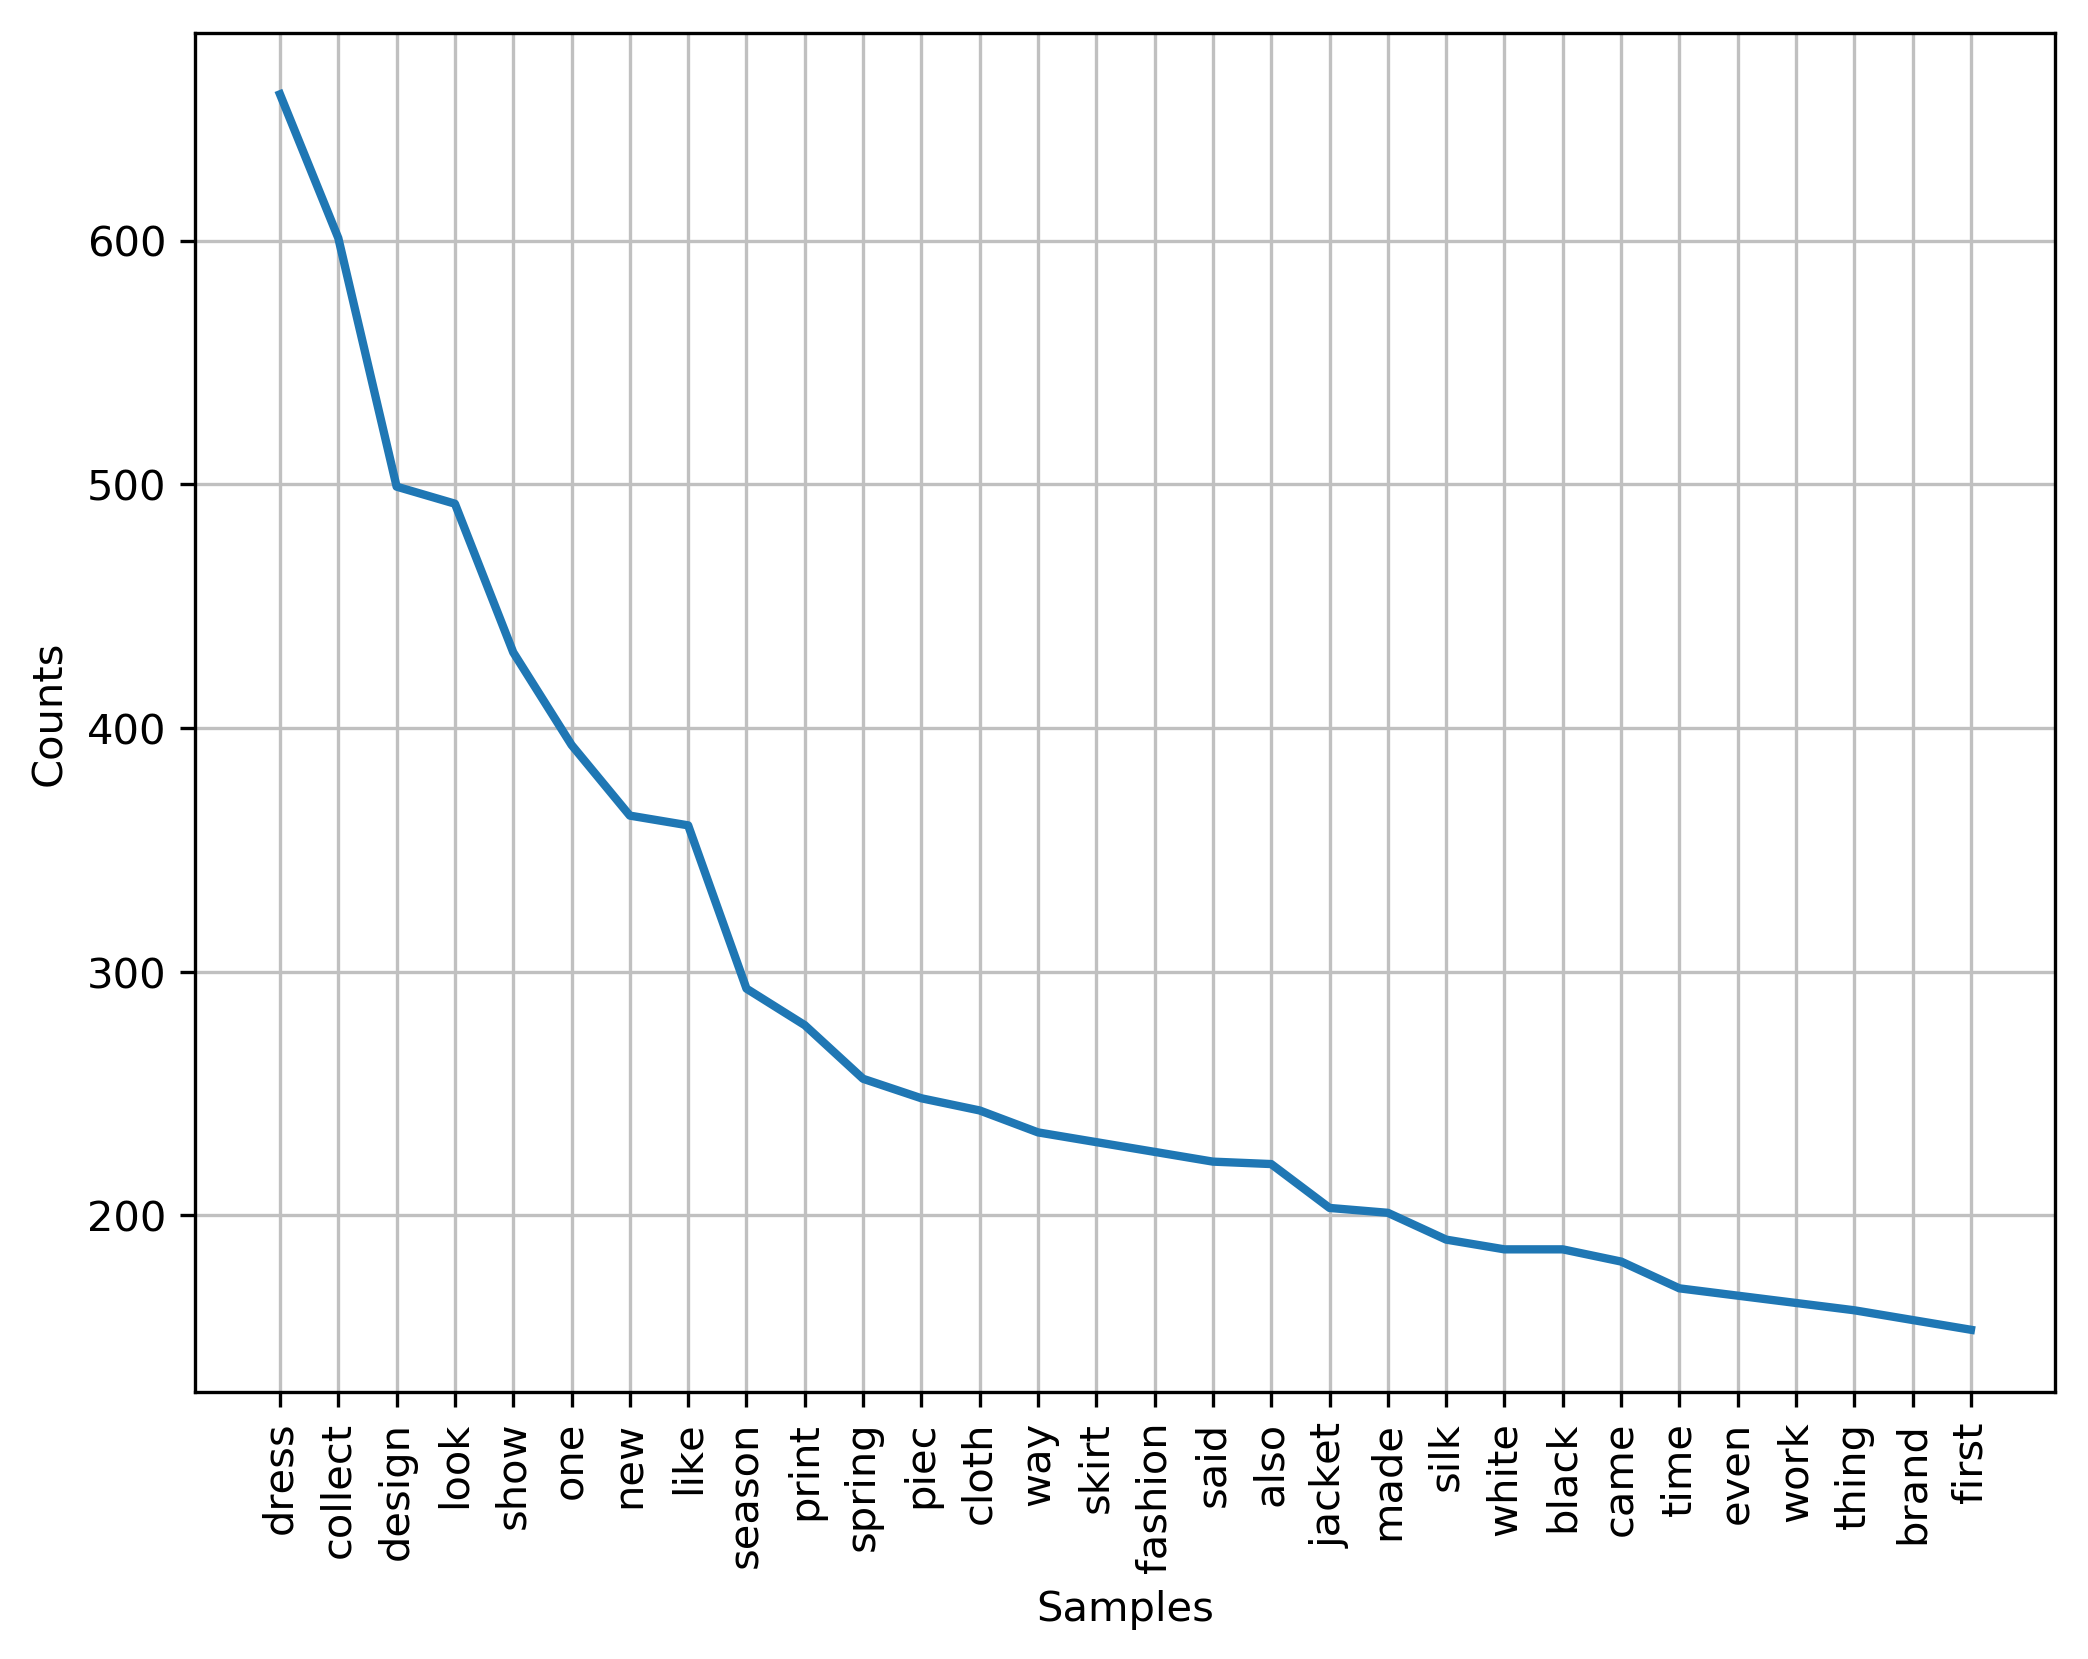

In [56]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
porter_f.plot(30)
plt.show()

In [ ]:
### 2.

In [58]:
#Steps are the same with the Porter Stemmer
lancaster = nltk.LancasterStemmer() #initializing stemmer
lan_result = [lancaster.stem(w) for w in words] #use the stemmer
print(len(lan_result))
#stem2 = [w for w in stem2]
lan_f = FreqDist(lan_result)
sorted_lan = sorted(lan_f.items(),key = lambda k: k[1], reverse = True)
sorted_lan

67866


[('dress', 662),
 ('collect', 603),
 ('design', 499),
 ('look', 493),
 ('show', 432),
 ('on', 394),
 ('new', 384),
 ('lik', 361),
 ('season', 295),
 ('print', 282),
 ('piec', 248),
 ('spring', 241),
 ('cloth', 240),
 ('way', 235),
 ('skirt', 231),
 ('fash', 226),
 ('said', 222),
 ('also', 221),
 ('ev', 220),
 ('wom', 215),
 ('mad', 207),
 ('jacket', 203),
 ('us', 201),
 ('silk', 192),
 ('whit', 188),
 ('black', 187),
 ('cam', 182),
 ('tim', 171),
 ('work', 168),
 ('real', 165),
 ('wear', 164),
 ('top', 163),
 ('styl', 163),
 ('thing', 161),
 ('col', 161),
 ('tak', 160),
 ('brand', 157),
 ('first', 153),
 ('mak', 151),
 ('sens', 151),
 ('back', 151),
 ('runway', 145),
 ('lin', 145),
 ('pant', 144),
 ('inspir', 142),
 ('point', 142),
 ('today', 140),
 ('cre', 137),
 ('art', 137),
 ('com', 136),
 ('feel', 135),
 ('fabr', 134),
 ('seem', 131),
 ('could', 129),
 ('suit', 128),
 ('wel', 128),
 ('would', 128),
 ('knit', 126),
 ('leath', 126),
 ('pair', 122),
 ('want', 121),
 ('lac', 121),
 ('

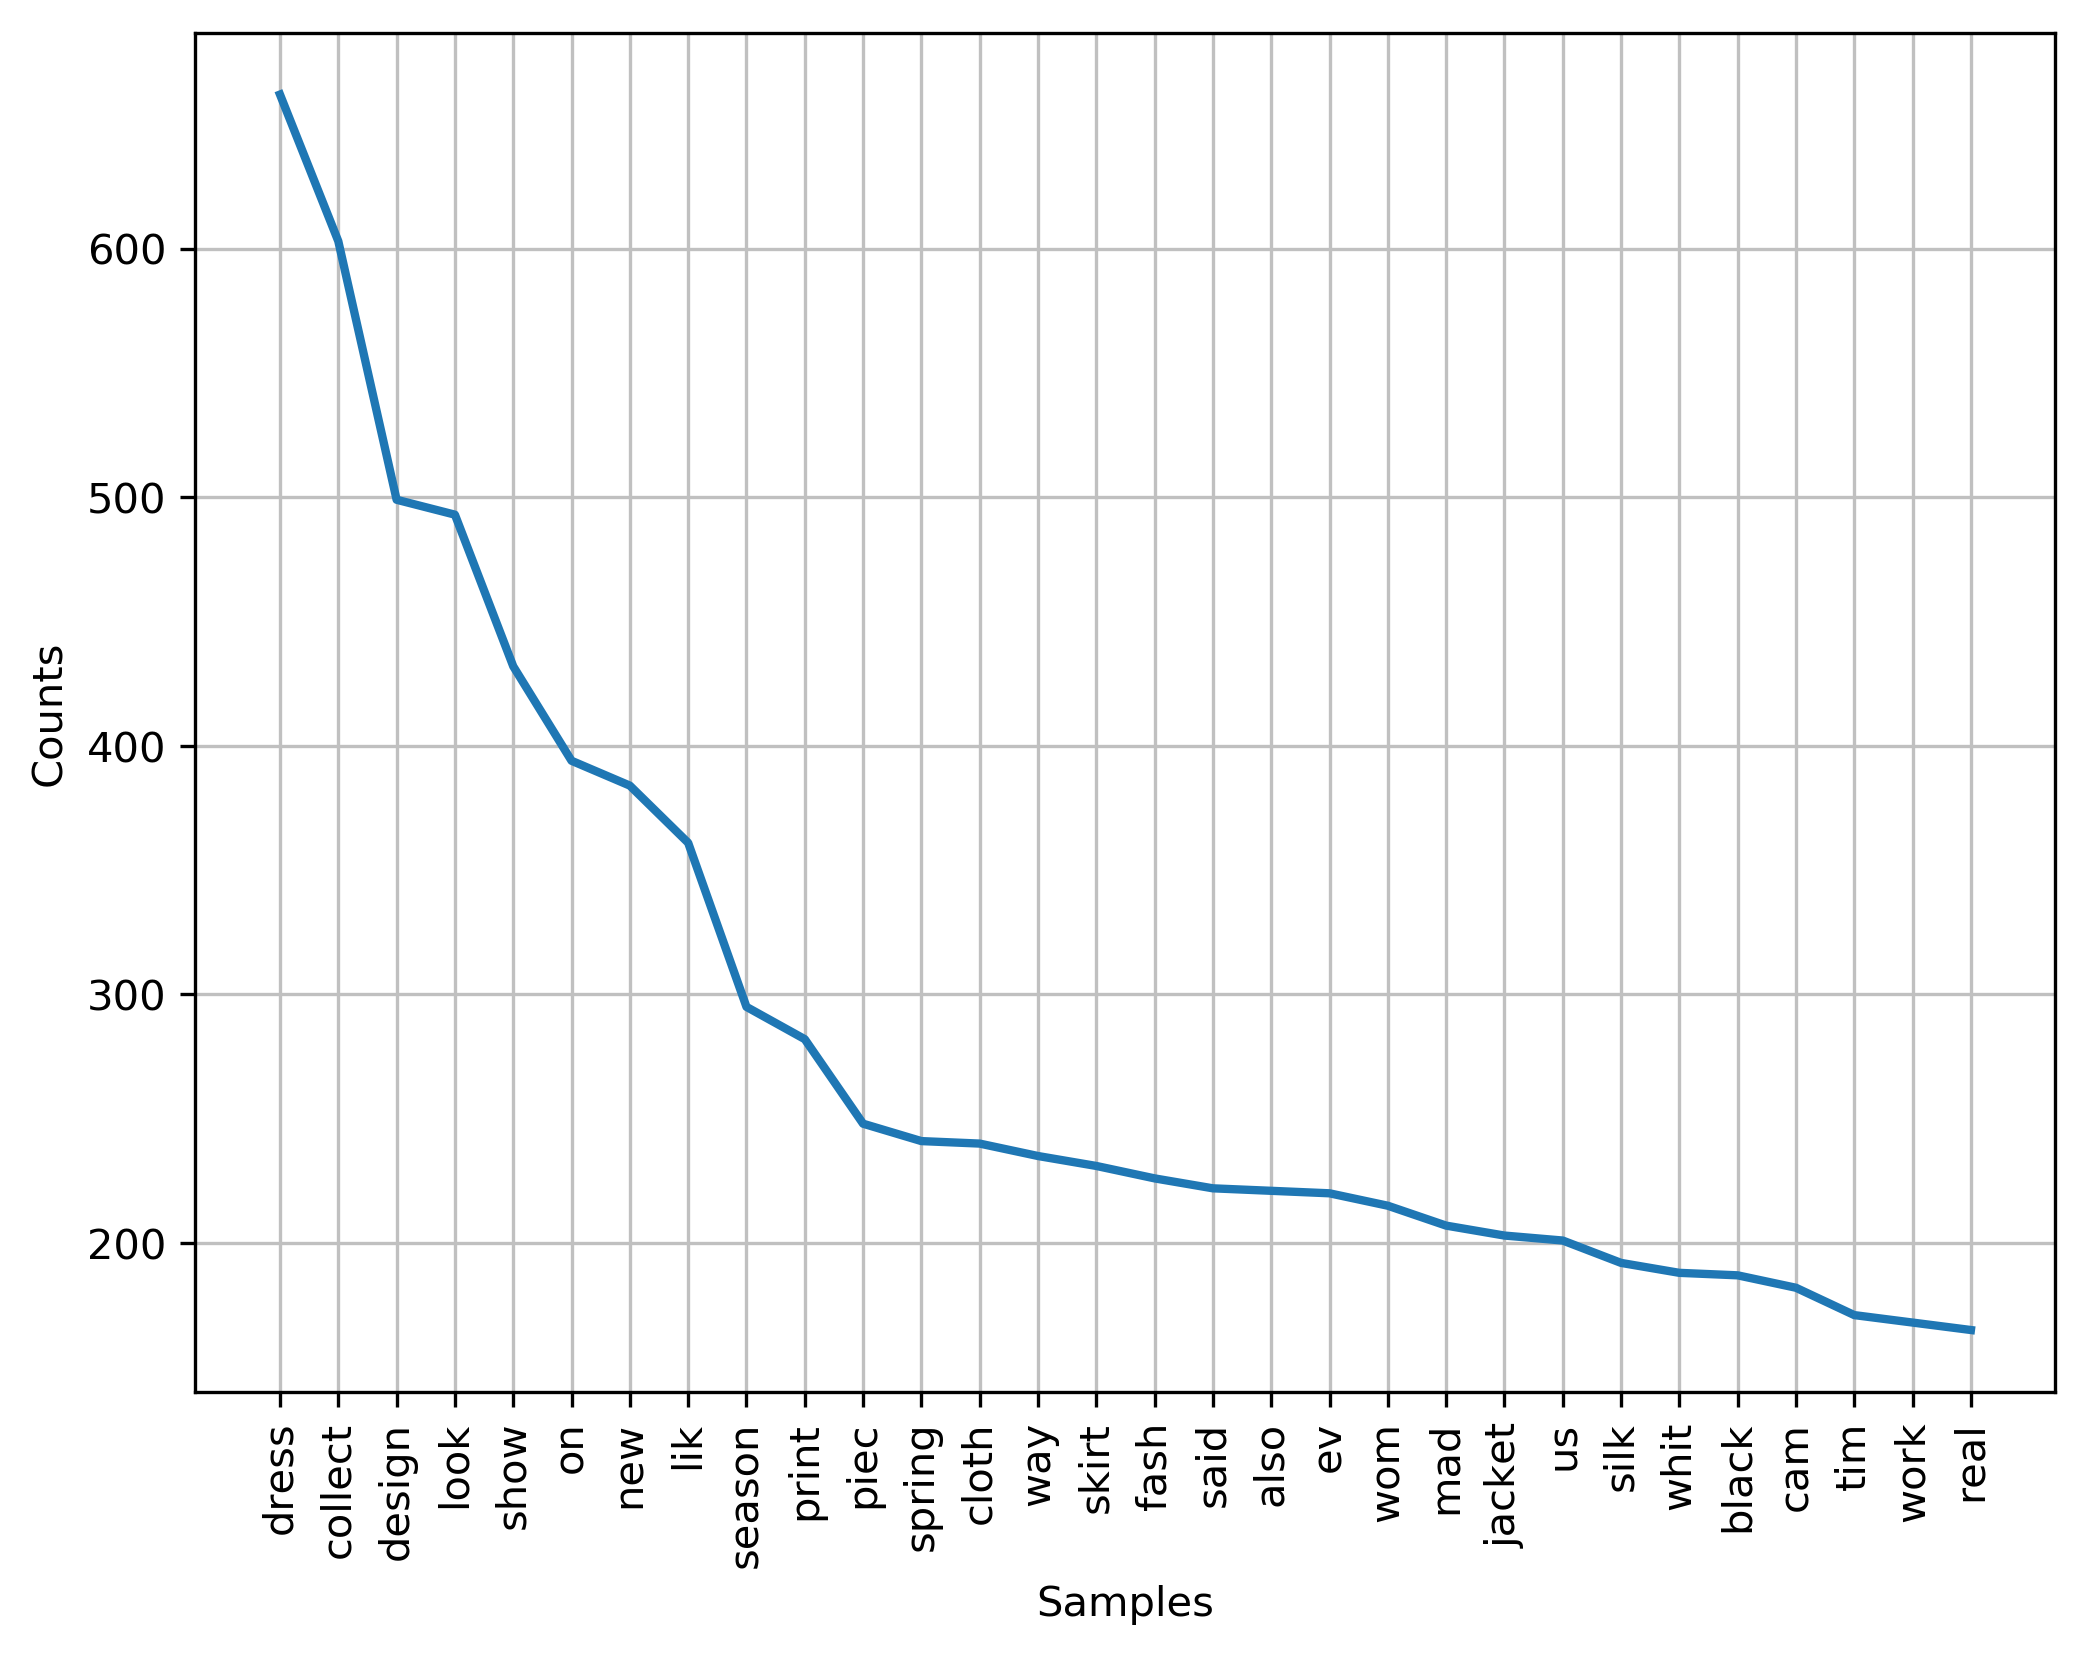

In [59]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
lan_f.plot(30)
plt.show()

### 3. WordNet Lemmatizer

In [61]:
#Steps are the same with the previous two stemmers 
wnl = nltk.WordNetLemmatizer()
wnl_result = [wnl.lemmatize(w) for w in words]
print(len(wnl_result))
wnl_f = FreqDist(wnl_result)
sorted_snl = sorted(wnl_f.items(),key = lambda k: k[1], reverse = True)
sorted_snl

67866


[('dress', 612),
 ('collection', 585),
 ('one', 393),
 ('designer', 390),
 ('look', 383),
 ('show', 359),
 ('new', 357),
 ('like', 326),
 ('season', 284),
 ('spring', 256),
 ('piece', 244),
 ('way', 234),
 ('skirt', 229),
 ('clothes', 226),
 ('said', 222),
 ('also', 221),
 ('fashion', 221),
 ('woman', 211),
 ('print', 204),
 ('jacket', 203),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 185),
 ('came', 181),
 ('time', 164),
 ('thing', 161),
 ('brand', 153),
 ('first', 153),
 ('runway', 145),
 ('pant', 144),
 ('back', 143),
 ('today', 140),
 ('top', 139),
 ('could', 129),
 ('well', 128),
 ('would', 128),
 ('leather', 126),
 ('knit', 119),
 ('point', 116),
 ('girl', 113),
 ('even', 111),
 ('color', 111),
 ('silhouette', 110),
 ('take', 108),
 ('lace', 108),
 ('model', 107),
 ('denim', 107),
 ('make', 106),
 ('year', 106),
 ('still', 106),
 ('fabric', 106),
 ('long', 105),
 ('though', 104),
 ('style', 104),
 ('red', 104),
 ('much', 103),
 ('around', 102),
 ('backstage', 97),

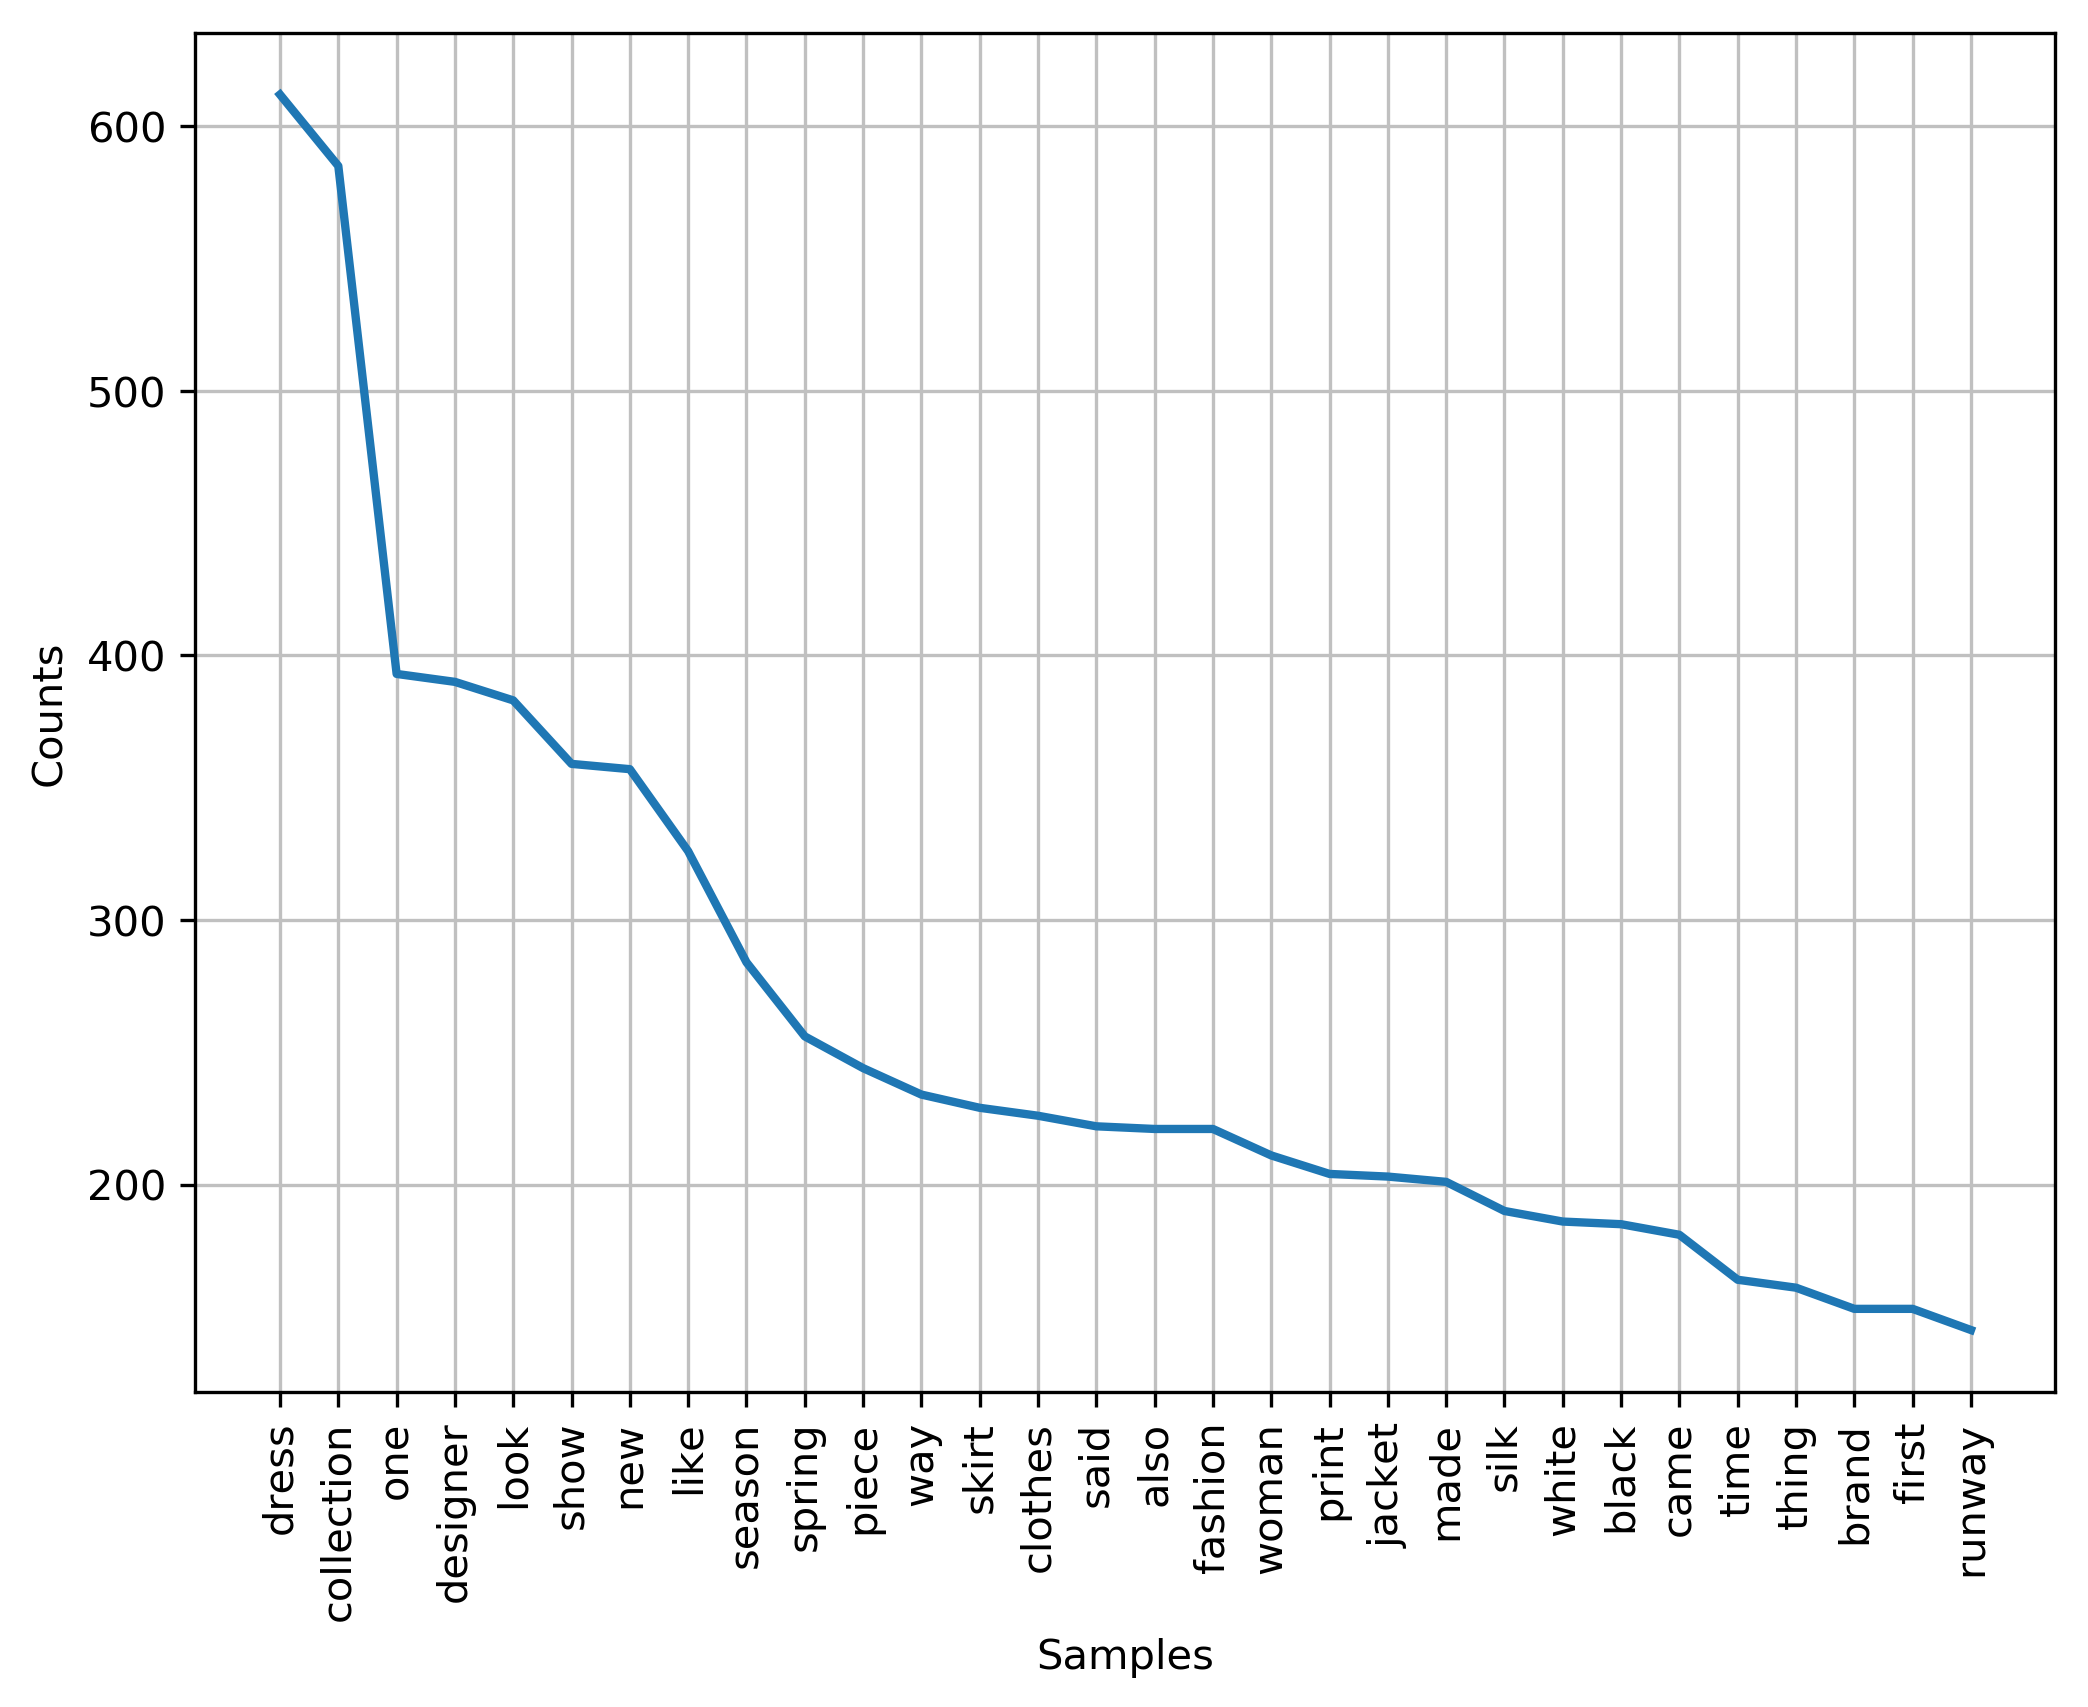

In [63]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
wnl_f.plot(30)
plt.show()

# 3.Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [67]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'
#Keep tags that start with 'N'
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

In [69]:
#Generate a frequency distribution 
Ntag_f = nltk.FreqDist(POS_tag_listN)
sorted_Ntag = sorted(Ntag_f.items(), key = lambda k:k[1], reverse = True)
sorted_Ntag

[(('collection', 'NN'), 976),
 (('dresses', 'NNS'), 542),
 (('dress', 'NN'), 538),
 (('show', 'NN'), 498),
 (('designer', 'NN'), 458),
 (('clothes', 'NNS'), 448),
 (('spring', 'NN'), 444),
 (('season', 'NN'), 442),
 (('fashion', 'NN'), 410),
 (('pieces', 'NNS'), 392),
 (('way', 'NN'), 386),
 (('silk', 'NN'), 332),
 (('designers', 'NNS'), 316),
 (('pants', 'NNS'), 252),
 (('time', 'NN'), 250),
 (('looks', 'NNS'), 246),
 (('look', 'NN'), 242),
 (('runway', 'NN'), 234),
 (('skirts', 'NNS'), 234),
 (('brand', 'NN'), 228),
 (('prints', 'NNS'), 222),
 (('today', 'NN'), 214),
 (('women', 'NNS'), 214),
 (('jackets', 'NNS'), 204),
 (('jacket', 'NN'), 200),
 (('point', 'NN'), 196),
 (('lace', 'NN'), 194),
 (('collections', 'NNS'), 192),
 (('skirt', 'NN'), 190),
 (('leather', 'NN'), 190),
 (('i', 'NN'), 188),
 (('sense', 'NN'), 180),
 (('print', 'NN'), 178),
 (('things', 'NNS'), 178),
 (('york', 'NN'), 176),
 (('models', 'NNS'), 170),
 (('backstage', 'NN'), 170),
 (('denim', 'NN'), 168),
 (('cott

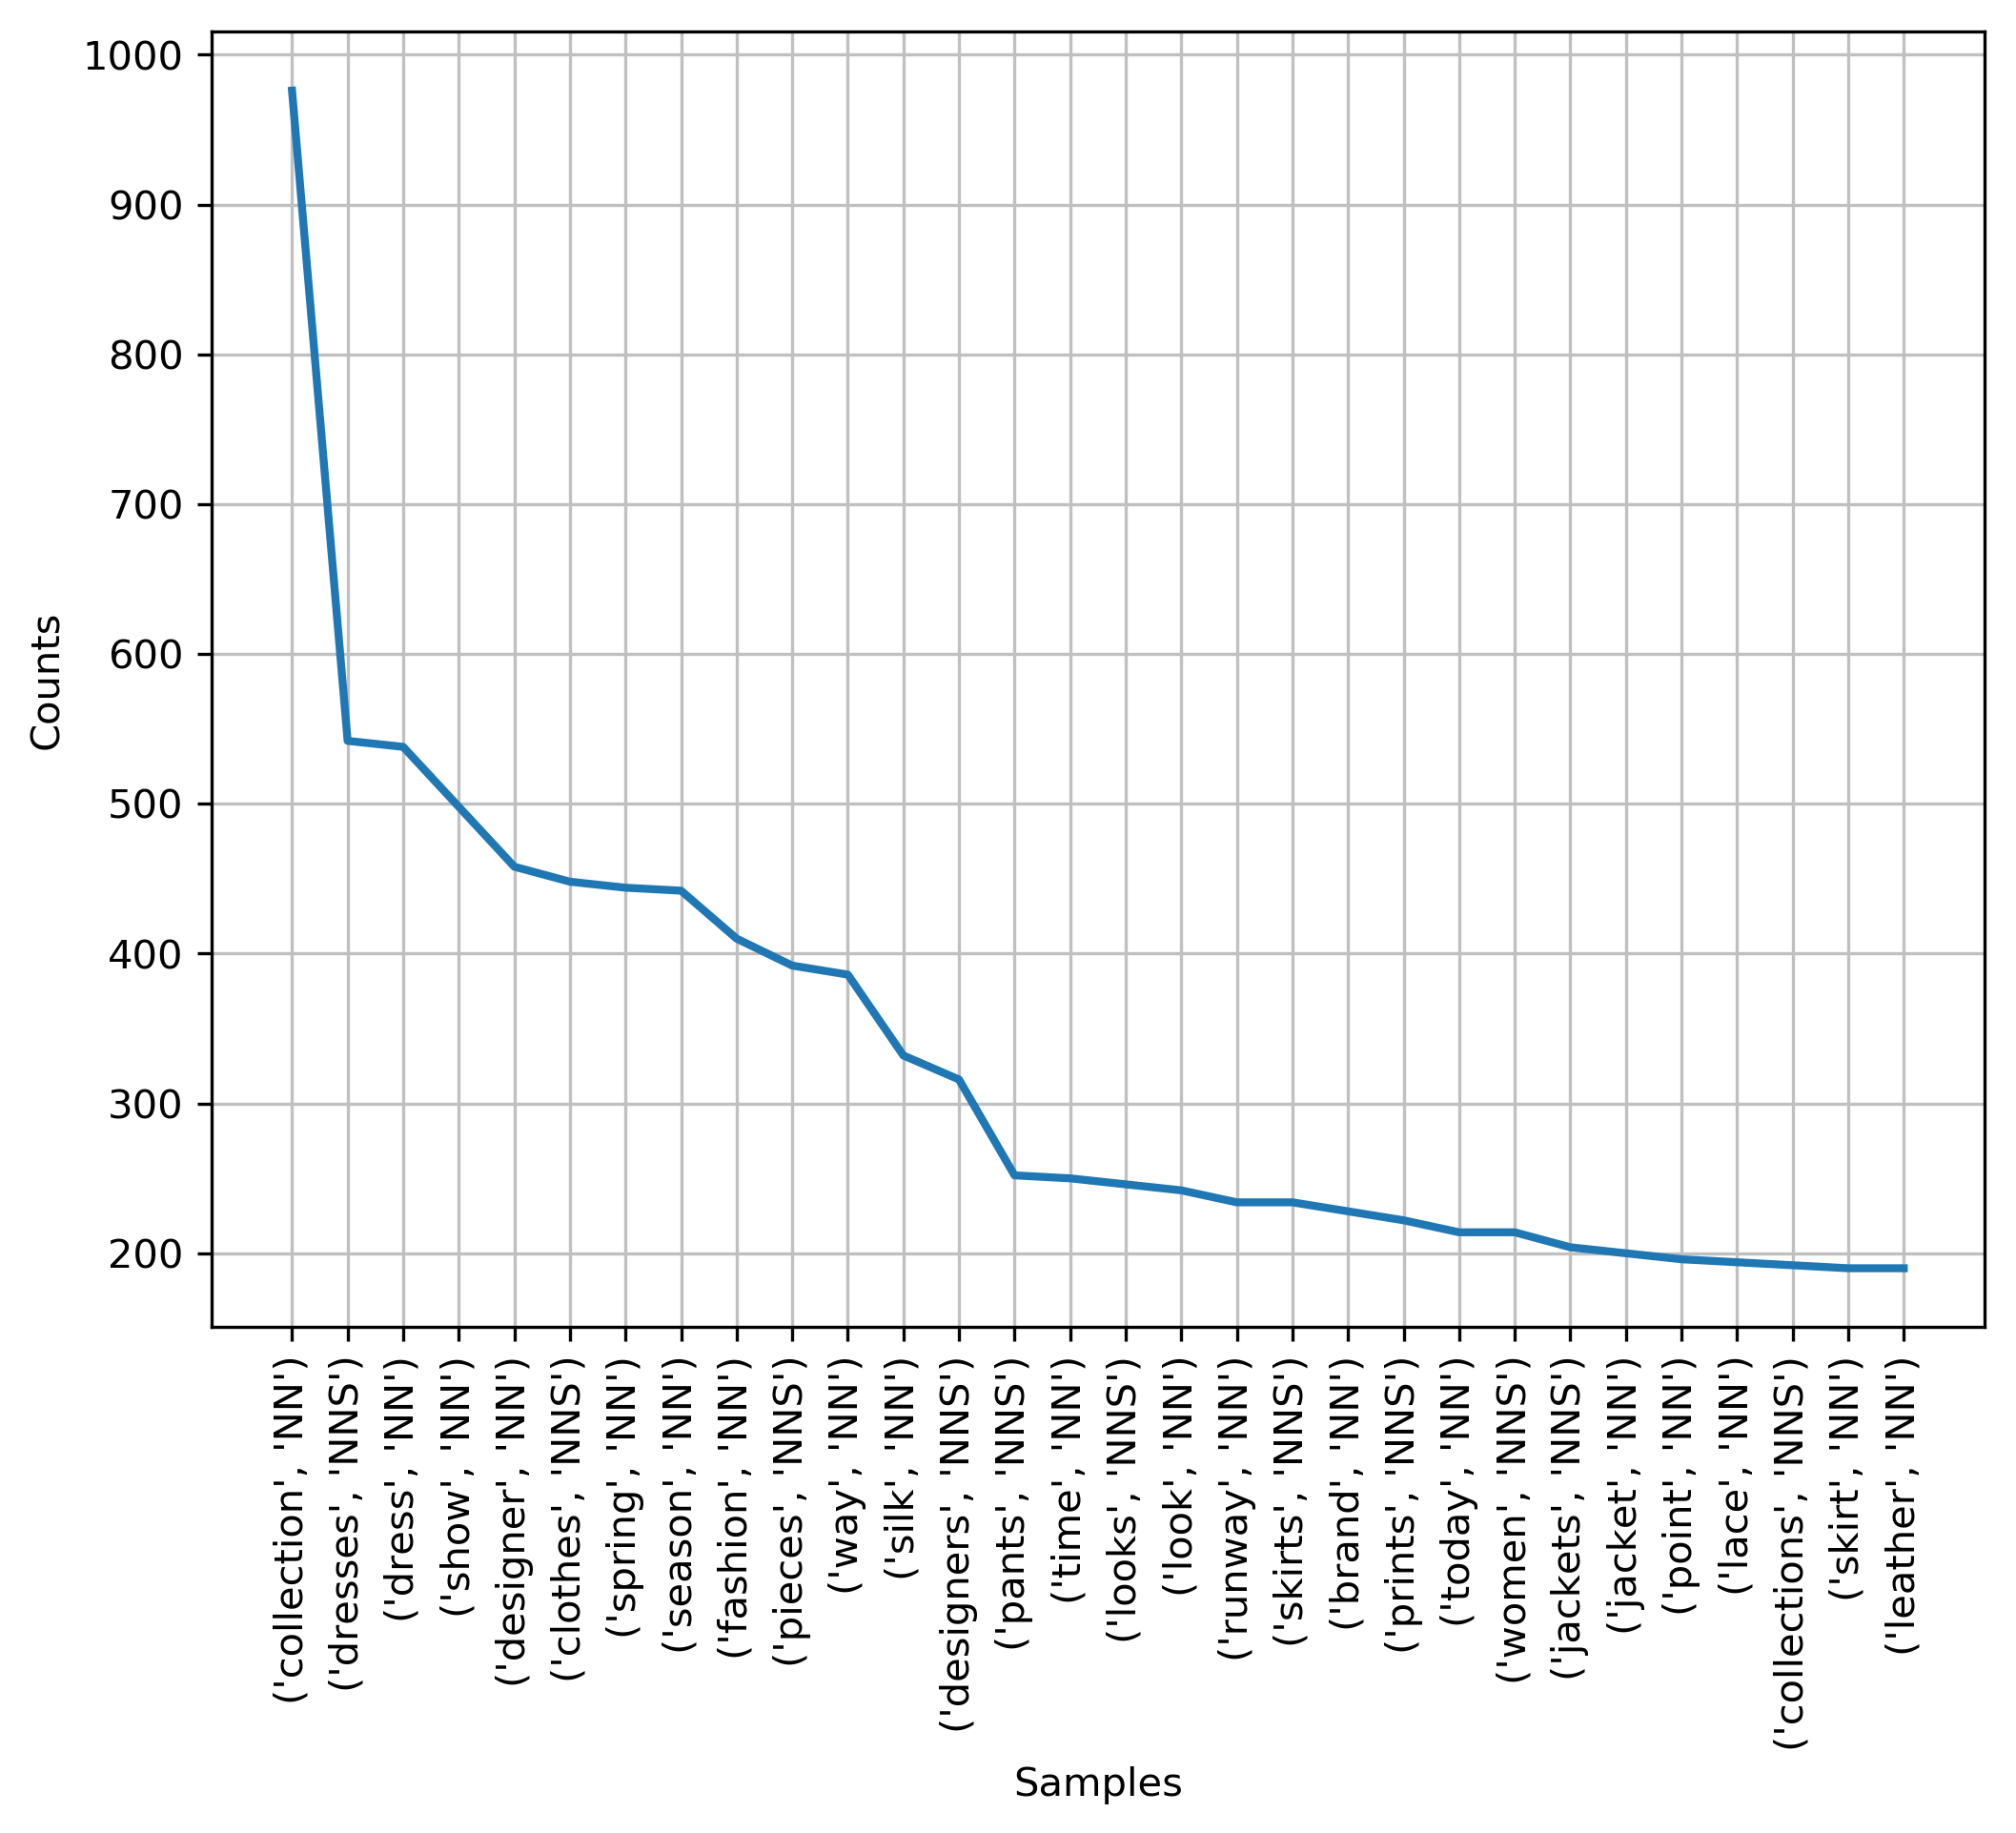

In [70]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
Ntag_f.plot(30)
plt.show()

# 4.Use POS approach and only focus on NNP 

In [82]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'
#Keep tags that start with 'N'
POS_tag_listNN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('NN')]
POS_tag_listNN

[('detachment', 'NN'),
 ('word', 'NN'),
 ('day', 'NN'),
 ('yes', 'NN'),
 ('labels', 'NNS'),
 ('sr', 'NN'),
 ('designer', 'NN'),
 ('concept', 'NN'),
 ('imagines', 'NNS'),
 ('today', 'NN'),
 ('detachment', 'NN'),
 ('gaze', 'NN'),
 ('others', 'NNS'),
 ('woman', 'NN'),
 ('runway', 'NN'),
 ('world', 'NN'),
 ('bend', 'NN'),
 ('taste', 'NN'),
 ('clothes', 'NNS'),
 ('dtacher', 'NN'),
 ('brand', 'NN'),
 ('shoppers', 'NNS'),
 ('season', 'NN'),
 ('kowalska', 'NN'),
 ('lineup', 'NN'),
 ('offerings', 'NNS'),
 ('collection', 'NN'),
 ('pair', 'NN'),
 ('midi', 'NN'),
 ('dresses', 'NNS'),
 ('print', 'NN'),
 ('pop', 'NN'),
 ('polka', 'NN'),
 ('dots', 'NNS'),
 ('cardigans', 'NNS'),
 ('kind', 'NN'),
 ('amoxicillin', 'NN'),
 ('dtacher', 'NN'),
 ('woman', 'NN'),
 ('tongue', 'NN'),
 ('firmly', 'NN'),
 ('cheek', 'NN'),
 ('allover', 'NN'),
 ('holes', 'NNS'),
 ('knits', 'NNS'),
 ('choice', 'NN'),
 ('materials', 'NNS'),
 ('dresses', 'NNS'),
 ('volumes', 'NNS'),
 ('lineup', 'NN'),
 ('albeit', 'NN'),
 ('times', 'N

In [79]:
#Generate a frequency distribution 
NNtag_f = nltk.FreqDist(POS_tag_listNN)
sorted_NNPtag = sorted(NNtag_f.items(), key = lambda k:k[1], reverse = True)
sorted_NNPtag

[(('madison', 'NNP'), 2),
 (('square', 'NNP'), 2),
 (('zealand', 'NNP'), 2),
 (('mt', 'NNP'), 2),
 (('xiao', 'NNP'), 2),
 (('von', 'NNP'), 2),
 (('kensington', 'NNP'), 2),
 (('x', 'NNP'), 2),
 (('karl', 'NNP'), 2),
 (('kris', 'NNP'), 2),
 (('louche', 'NNP'), 2),
 (('december', 'NNP'), 2),
 (('karin', 'NNP'), 2),
 (('minneapolis', 'NNP'), 2),
 (('mount', 'NNP'), 2),
 (('mood', 'NNP'), 2),
 (('zac', 'NNP'), 2),
 (('zimmermann', 'NNP'), 2)]

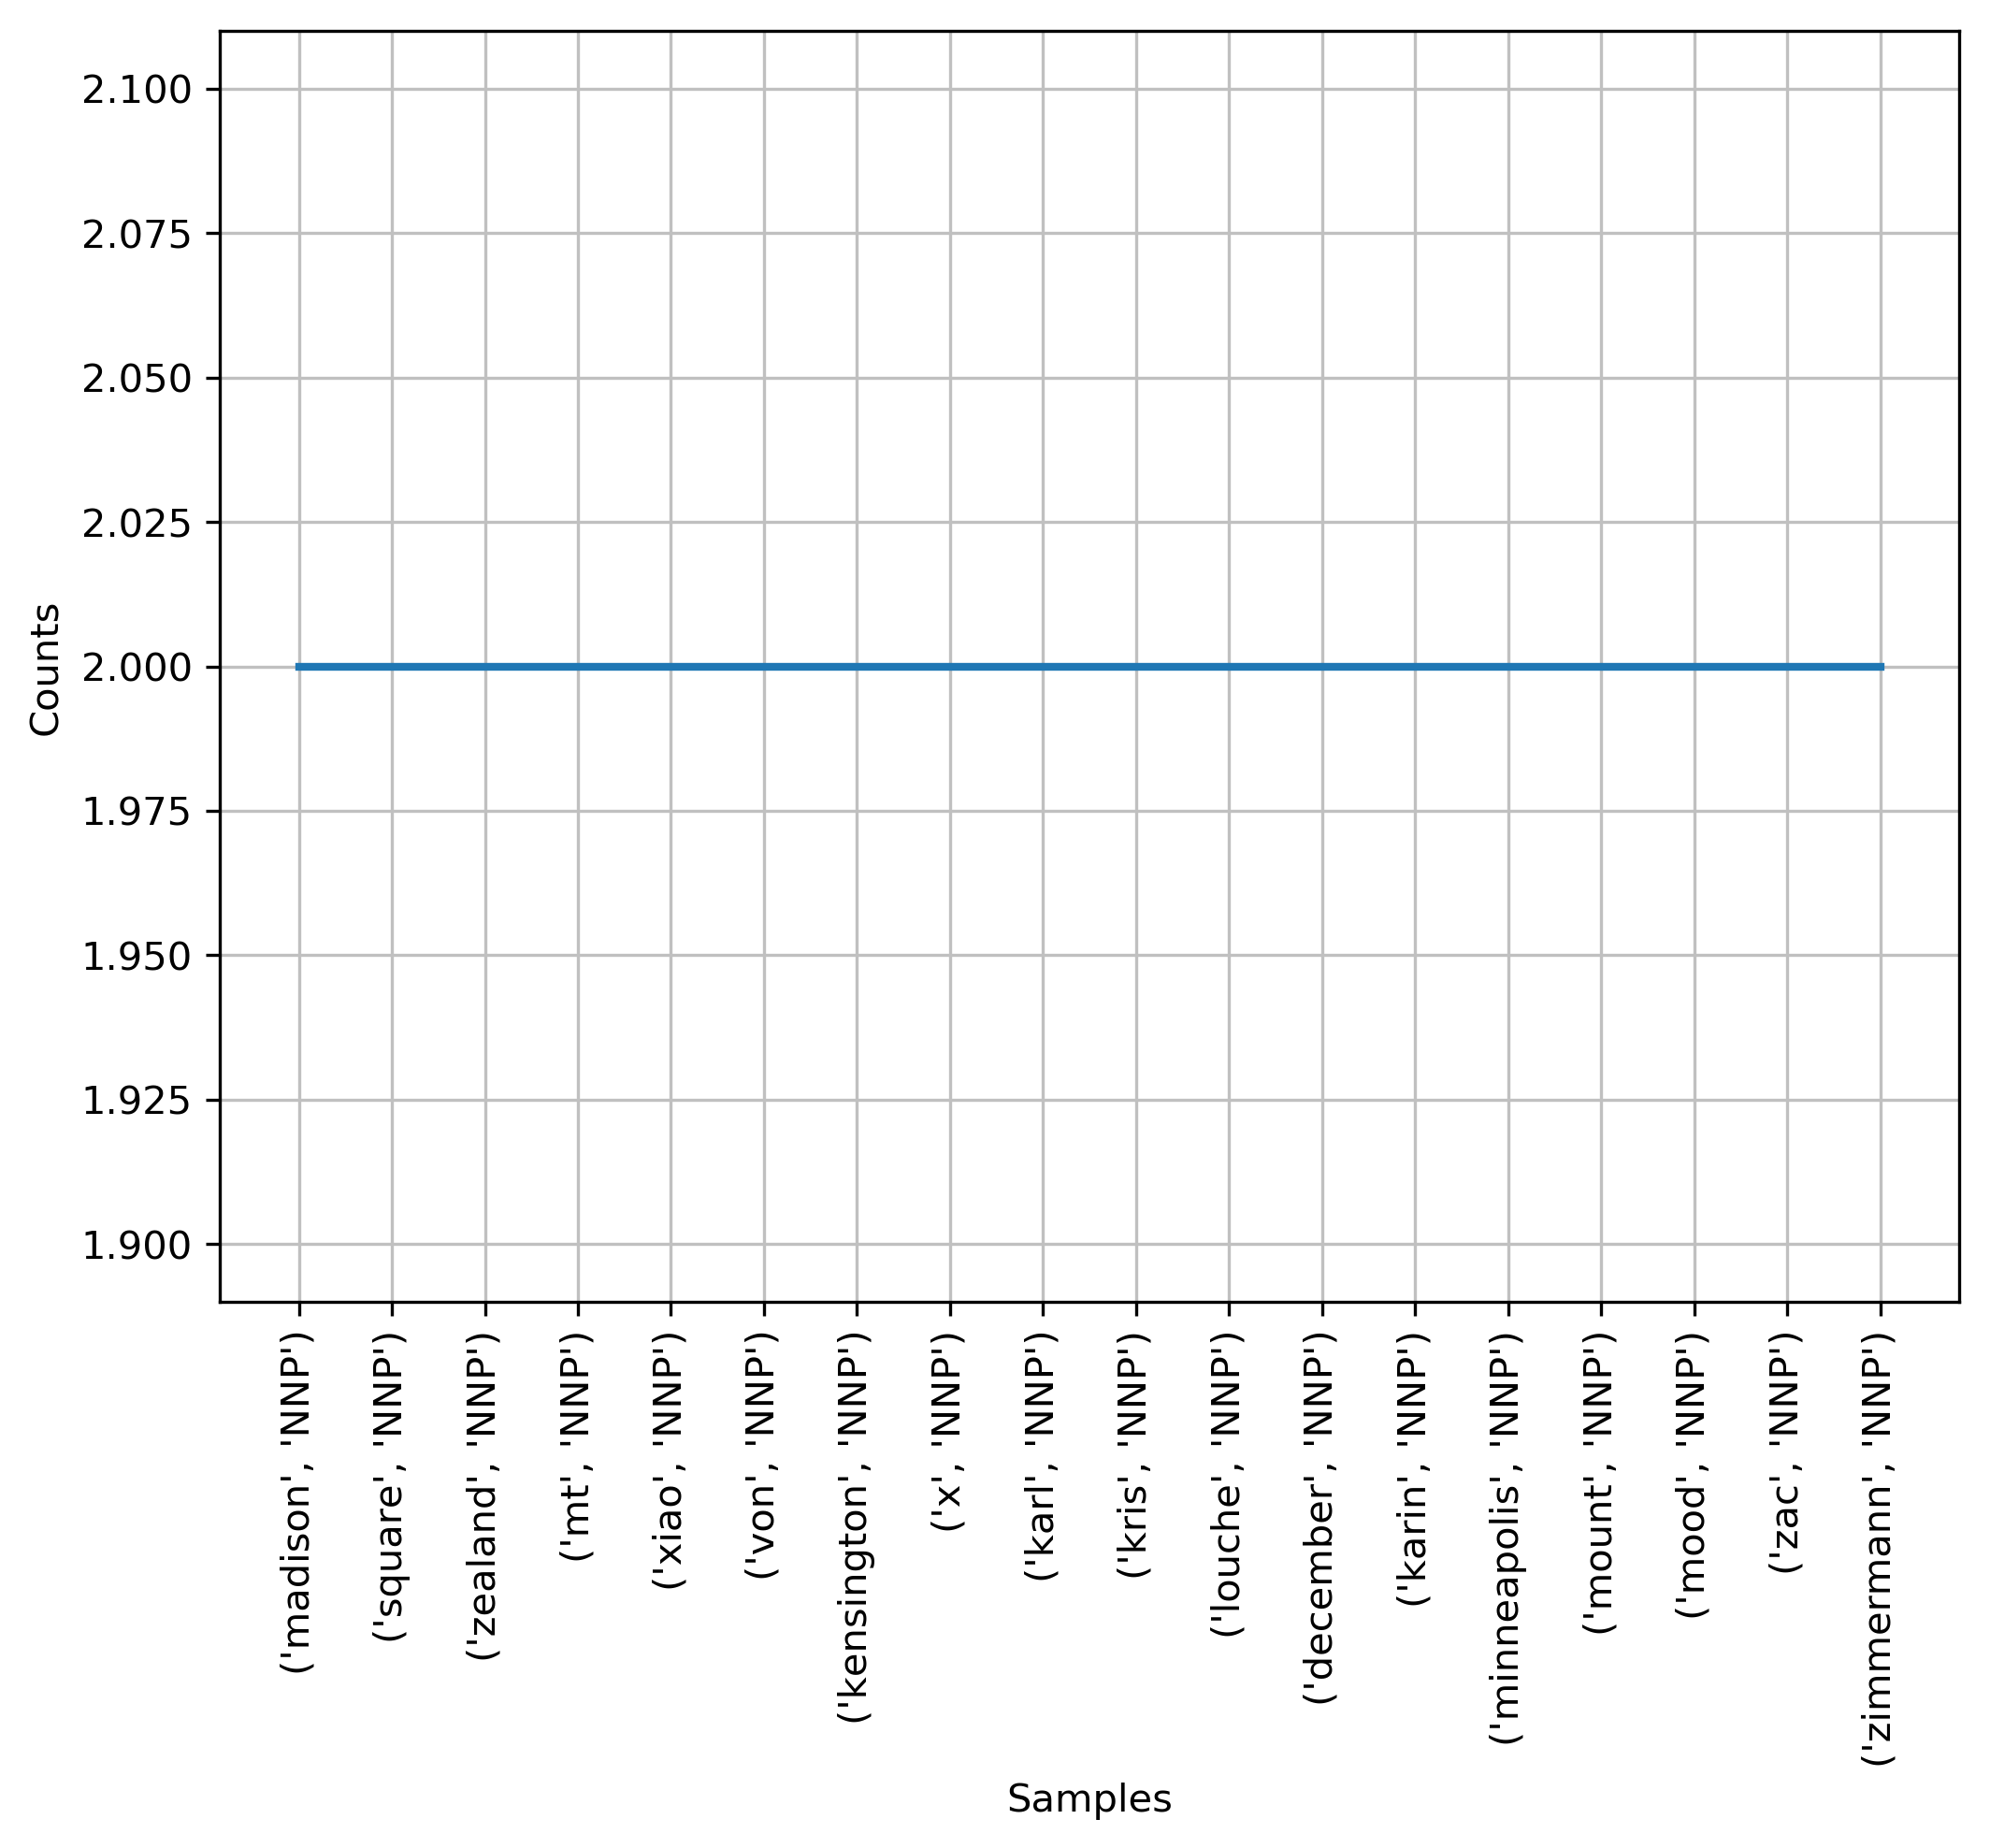

In [77]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
NNtag_f.plot(30)
plt.show()